In [8]:
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def extract_val(d, key):
    val_start = d.find(key)
    val_end = val_start + d[val_start:].find(",")
    val = d[val_start:val_end].split("=")[1]
    return val.replace("'", "")

def load_logs(logfile):
    with open(logfile, "r") as f:
        data = f.readlines()
    
    retdata = defaultdict(list)
    alg = None
    
    for d in data:
        if "data_kind" in d:
            data_kind = extract_val(d, "data_kind")
            inp_to_eval = extract_val(d, "inp_to_eval")
            nq = int(extract_val(d, "num_queries"))
            wk = extract_val(d, "workload")
            
        if "-->" in d:
            linedata = d.split(" ")
            ehash = linedata[5]
            rt = float(linedata[-1].replace("\n", ""))
            rep = int(linedata[-3])
            retdata["ehash"].append(ehash)
            retdata["rt"].append(rt)
            retdata["rep"].append(rep)
            retdata["data_kind"].append(str(data_kind))
            retdata["inp_to_eval"].append(inp_to_eval)
            retdata["num_queries"].append(nq)
            retdata["workload"].append(wk)
        
        if "QError" in d:
            print(inp_to_eval)
            print(data_kind)
            print(d)
            
    df = pd.DataFrame(retdata)
    return df

In [14]:
LOGDIR = "../results/"

In [15]:
fns = glob.glob(LOGDIR + "*.log")
dfs = []

for fn in fns:
    df = load_logs(fn)
    dfs.append(df)

n
random_domain2
[2022-05-14 08:01:21,245] {eval_data.py:162} INFO - QError, mean: 752.3882076052228, median: 1.542867180969178, 90p: 5.689734839454503

n
test_shuffle2
[2022-05-15 06:29:05,028] {eval_data.py:162} INFO - QError, mean: 4711.038480996889, median: 1.001356763844805, 90p: 163.40336041692473

mi
random_domain2
[2022-05-15 04:02:41,449] {eval_data.py:162} INFO - QError, mean: 771.9163468684768, median: 2.529184819694504, 90p: 8.857875883434989

mi
test_shuffle2
[2022-05-15 00:13:58,089] {eval_data.py:162} INFO - QError, mean: 706.216994993233, median: 1.050012585759124, 90p: 2.7059053525684233

mi
true_cols
[2022-05-14 17:08:28,002] {eval_data.py:162} INFO - QError, mean: 1.0251791018046714, median: 1.0, 90p: 1.0

n
test_shuffle2
[2022-05-14 07:56:25,536] {eval_data.py:162} INFO - QError, mean: 1677.3921304360906, median: 1.001356763844805, 90p: 56.01075859252573

mi
random_domain2
[2022-05-14 07:19:59,783] {eval_data.py:162} INFO - QError, mean: 1089.193606822838, median: 2

In [29]:
df = pd.concat(dfs)

In [30]:
print(set(df["data_kind"]), set(df["inp_to_eval"]))
df

{'true_cols', 'test_shuffle2', 'random_domain2'} {'mi', 'n'}


,ehash,rt,rep,data_kind,inp_to_eval,num_queries,workload
0,1412706111350165054529954383171903240337882399016,0.473330,0,random_domain2,n,500,ceb
1,845697540102295928657811596227970506096002273384,0.512285,0,random_domain2,n,500,ceb
2,428479027960649776600128440654385951132899596406,0.136692,0,random_domain2,n,500,ceb
3,84075949613328714275869842821526357397337767243,0.133870,0,random_domain2,n,500,ceb
4,1331203710710213837019143823676324531895931998752,0.265568,0,random_domain2,n,500,ceb
...,...,...,...,...,...,...,...
1495,1063466332439605995761783624533110685102934053128,0.111993,2,true_cols,n,500,ceb
1496,216408456000682405708249478876159637241851169399,0.153612,2,true_cols,n,500,ceb
1497,1425979425022617961196684811888845962957194079395,0.115123,2,true_cols,n,500,ceb
1498,207133359698626392416029221914781840852700798979,0.151144,2,true_cols,n,500,ceb


In [31]:
print(df.keys())

Index(['ehash', 'rt', 'rep', 'data_kind', 'inp_to_eval', 'num_queries',
       'workload'],
      dtype='object')


In [32]:
#df = df[df.data_kind != 'random_domain']
df = df[df.inp_to_eval == 'mi']
df = df[df.num_queries == -1]

In [33]:
print(set(df["num_queries"]))

{-1}


In [34]:
df.groupby(["data_kind"])["rt"].sum()

data_kind
random_domain2    13718.868159
test_shuffle2     25525.967314
true_cols         32822.757414
Name: rt, dtype: float64

In [35]:
df.groupby(["data_kind"])["rt"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
random_domain2,11175.0,1.227639,0.198702,0.860783,1.194423,1.520516,1.828948,2.002681
test_shuffle2,11175.0,2.284203,0.144830,1.863653,2.286995,2.478333,2.636658,2.771922
true_cols,11175.0,2.937160,0.141678,2.549719,2.926577,3.137953,3.249693,3.451296


In [36]:
tmp = df.groupby(["ehash", "data_kind"])[["rt"]].mean().reset_index()

In [37]:
edf = tmp.set_index(['ehash', 'data_kind'])['rt'].unstack().reset_index()

<AxesSubplot:xlabel='test_shuffle2', ylabel='true_cols'>

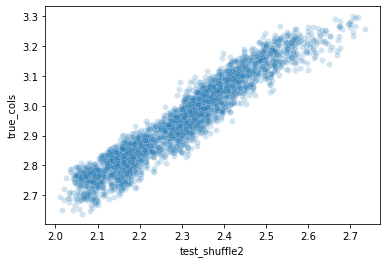

In [38]:
sns.scatterplot(data=edf, x = "test_shuffle2", y="true_cols", alpha=0.2)

<AxesSubplot:xlabel='random_domain2', ylabel='true_cols'>

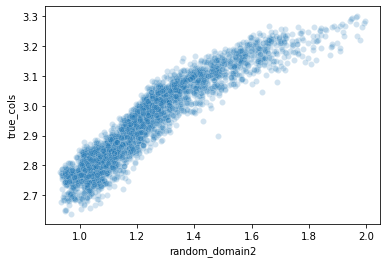

In [39]:
sns.scatterplot(data=edf, x = "random_domain2", y="true_cols", alpha=0.2)